# **Presentacion**

Este proyecto se centra en una base de datos que analizaremos para predecir el precio de las vivendas en relacion a sus caracteristicas. El objetivo poder entrenar un modelo de Marchine Learning que pueda predecir los precios de las casas a los mas cerncano posible a los reales.

Importo las librerias que vamos a usar y la base de *datos*

In [1]:
import pandas as pd
datos = pd.read_csv('/content/drive/MyDrive/train.csv')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate,KFold
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import lightgbm as lgb
datos

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Ingienieria de variable

## Verificacion de los tipos de datos

In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Verifico la cantidad de datos nulos que se encuentran por columna/variable

In [3]:
pd.set_option('display.max_columns', None)

null_counts = datos.isnull().sum()

print(null_counts.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Verifico si se encuentran datos duplicados

In [4]:
duplicados_id = datos['Id']
duplicados_id.duplicated().sum()

0

Se eliminan las columnas que no aportan un gran valor al analisis de datos:
Id: Se elimina por que representa un valor unico y no se puede sacar ningun tipo de 'hipotesis'
GarageYrBlt: Se elimine esta columna por que el año en el garage fue construido no es tan importante ya que se considera mas importante el año del remodelado general de la vivienda
LotConfig: Se aparta esta columna ya que no contiene contiene contenido importante al presentar valores repetidos con la columna
HouseStyle, YearBuilt: Se eliminan estas columnas por que varios valores coinsiden con la columna de 'MSSubClass'
ExterQual: La informacion de esta columna es exactamente la misma informacion que la columna de 'GeneralCond'
1stFlrSF, 2ndFlrSF, LowQualFinSF: Esta columna se sacan por que en la columna de 'LotArea' nos proporciona la misma informacion
PoolQC, Fence, MiscFeature, FireplaceQu: Estas columnaa se eliminaron por se encuentran en un 80% con datos nulos y no hay forma de poder reemplazar estos datos faltantes
GarageQual: Esta columna se elimina por que representa la misma informacion que la columna de GarageCond
YrSold: Esta columna se elimina por que no representa un valor significativo al analisis de datos
SaleType: Esta columna representa la misma informacion que columna de SaleCondition
BsmtFinSF1, BsmtFinSF2: Estas columnas se eliminan por que no se considera importante los valores de pies cuadrados del sotano



In [5]:
columnas_a_eliminar = ['Id','GarageYrBlt','Alley','LotConfig','HouseStyle','YearBuilt','ExterQual','1stFlrSF','2ndFlrSF','FireplaceQu','GarageQual','3SsnPorch','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','BsmtFinSF1','BsmtFinSF2','LowQualFinSF']
datos = datos.drop(columnas_a_eliminar, axis=1)
datos

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,Y,0,61,0,0,0,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,6,8,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,Y,298,0,0,0,0,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,Y,0,42,0,0,0,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,Y,0,35,272,0,0,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,Y,192,84,0,0,0,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Gtl,Gilbert,Norm,Norm,1Fam,6,5,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,Y,0,40,0,0,0,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Gtl,NWAmes,Norm,Norm,1Fam,6,6,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,Y,349,0,0,0,0,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,9,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,Y,0,60,0,0,0,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Gtl,NAmes,Norm,Norm,1Fam,5,6,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,CBlock,TA,TA,Mn,GLQ,Rec,0,1078,GasA,Gd,Y,FuseA,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,Y,366,0,112,0,0,Normal,142125


In [6]:
Max=datos['SalePrice'].max()
Min=datos['SalePrice'].min()
Promedio=datos['SalePrice'].mean()

print ("El precio de la propiedad mas alto es de: ",Max)
print ("El precio de la propiedad mas baja es de: ",Min)
print ("El preciopromedio de las propiedades es de: ",Promedio)

El precio de la propiedad mas alto es de:  755000
El precio de la propiedad mas baja es de:  34900
El preciopromedio de las propiedades es de:  180921.19589041095


Se crea un nueva columna "Calificacion" a partir de la columna de 'SalePrice', en la cual se le asigna un valor de 1 a las casas con un valor menor a 180000, un 2 a las casas con un valor de 180000  y un 3 a las casas con un valor mayor a 180000. Estas medidas se realizaron de acuerdo a los precios sacados en la celda de arriba

In [7]:
datos.loc[datos['SalePrice'] < 180000, 'Calificacion'] = 1
datos.loc[datos['SalePrice'] == 180000 , 'Calificacion'] = 2
datos.loc[datos['SalePrice'] >= 180001 , 'Calificacion'] = 3

En este grafico se muestran la cantidad de vecindarios segun su 'Calificacion'

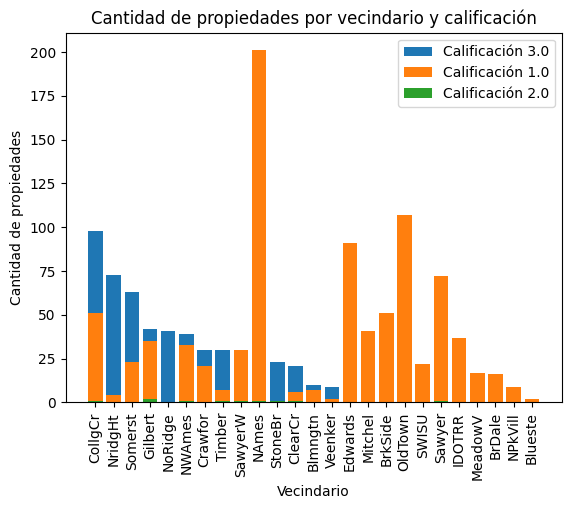

In [8]:
precios_por_calificacion = {}


for calificacion in datos['Calificacion'].unique():

    precios_vecindario = datos[datos['Calificacion'] == calificacion]


    conteo_por_vecindario = precios_vecindario['Neighborhood'].value_counts()


    precios_por_calificacion[calificacion] = conteo_por_vecindario

fig, ax = plt.subplots()
for calificacion, conteo_por_vecindario in precios_por_calificacion.items():
    ax.bar(conteo_por_vecindario.index, conteo_por_vecindario.values, label=f'Calificación {calificacion}')


ax.set_title('Cantidad de propiedades por vecindario y calificación')
ax.set_xlabel('Vecindario')
ax.set_ylabel('Cantidad de propiedades')
ax.legend()
plt.xticks(rotation=90)
plt.show()

En este grafico se muestran la cantidad de vecindarios mas 'caros' (correspondiente al valor 3 de la columna de 'Calificacion')

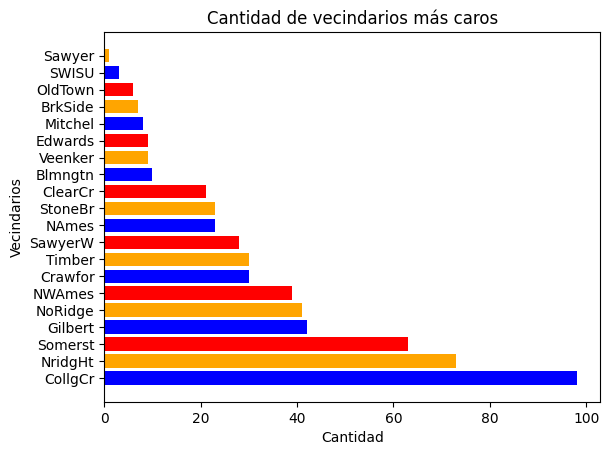

In [9]:
Precios_vecindario = datos[datos['Calificacion'] ==  3]


Vecindario = Precios_vecindario['Neighborhood'].value_counts()

plt.barh(Vecindario.index, Vecindario.values, color=['blue', 'orange', 'red'])
plt.title('Cantidad de vecindarios más caros')
plt.xlabel('Cantidad')
plt.ylabel('Vecindarios')
plt.show()

En este codigo se reemplazan los daots nulos de la columna de 'LotFrontage' de acuerdo a la moda que le corresponde segun su valor de calificacion, es decir que si el dato nulo se encuentra en la fila en donde el valor de calificaion es un 3, el dato nulo se reemplzara por la moda de la columna de 'LotFrontage' que tengan el mismo valor de 'Calificacion'

In [10]:
mode_1 = datos.loc[datos['Calificacion'] == 1, 'LotFrontage'].mode()[0]
mode_2 = datos.loc[datos['Calificacion'] == 2, 'LotFrontage'].mode()[0]
mode_3 = datos.loc[datos['Calificacion'] == 3, 'LotFrontage'].mode()[0]

datos.loc[(datos['Calificacion'] == 1) & (datos['LotFrontage'].isnull()), 'LotFrontage'] = mode_1
datos.loc[(datos['Calificacion'] == 2) & (datos['LotFrontage'].isnull()), 'LotFrontage'] = mode_2
datos.loc[(datos['Calificacion'] == 3) & (datos['LotFrontage'].isnull()), 'LotFrontage'] = mode_3


print(datos['LotFrontage'].isnull().sum())

0


Primero se realizo un conteo de cuales son las zonas mas solicitadas, luego en los graficos se presentan las zonas mas solicitadas de acuedo a su calificacion, en el grafico de barras se presentan las zonas mas solicitadas de las casas con un valor 'alto' y en el grafico de torta se presentan las zonas mas solicitadas de las casas con un valor 'bajo'

Lista de las zonas mas solicitadas:  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


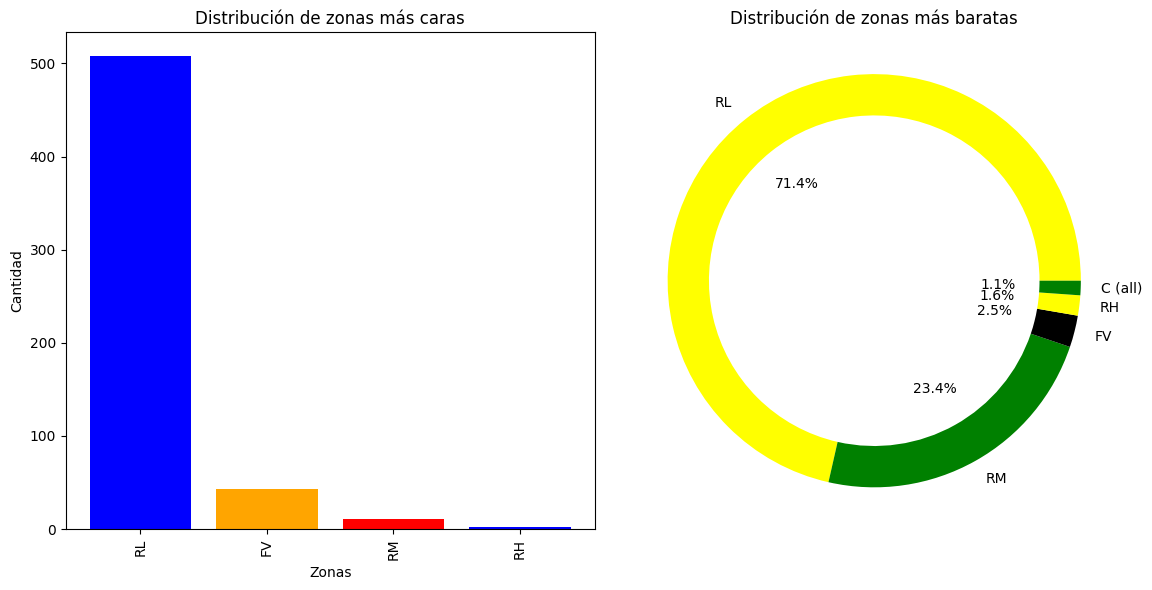

In [11]:
resultado = datos['MSZoning'].value_counts()
print("Lista de las zonas mas solicitadas: ",resultado)

precios_zonas_cara = datos[datos['Calificacion'] == 3]
precios_zonas_barata = datos[datos['Calificacion'] == 1]

zonas_cara = precios_zonas_cara['MSZoning'].value_counts()
zonas_barata = precios_zonas_barata['MSZoning'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(zonas_cara.index, zonas_cara.values, color=['blue', 'orange', 'red'])
axs[0].set_title('Distribución de zonas más caras')
axs[0].set_xlabel('Zonas')
axs[0].set_ylabel('Cantidad')
axs[0].tick_params(axis='x', rotation=90)

axs[1].pie(zonas_barata.values, labels=zonas_barata.index, autopct='%1.1f%%', wedgeprops=dict(width=0.2), colors=['yellow', 'green', 'black'])
axs[1].set_title('Distribución de zonas más baratas')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

Primero se realizo un conteo de cuales son el tipo de vivienda mas solicitadas, luego en los graficos se presentan el tipo de vivienda mas solicitadas de acuedo a su calificacion, les recuerda que explica cada valor de la columna presentada:
BldgType: Tipo de vivienda
- 1familia	Unifamiliar Independiente
- 2FmCon	Conversión bifamiliar; originalmente construido como vivienda
  unifamiliar
- Dúplex	Dúplex
- TwnhsE	Unidad final de casa adosada
- TwnhsI	Unidad interior de la casa adosada

Lista del tipo de vivienda mas solicitadas:  BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


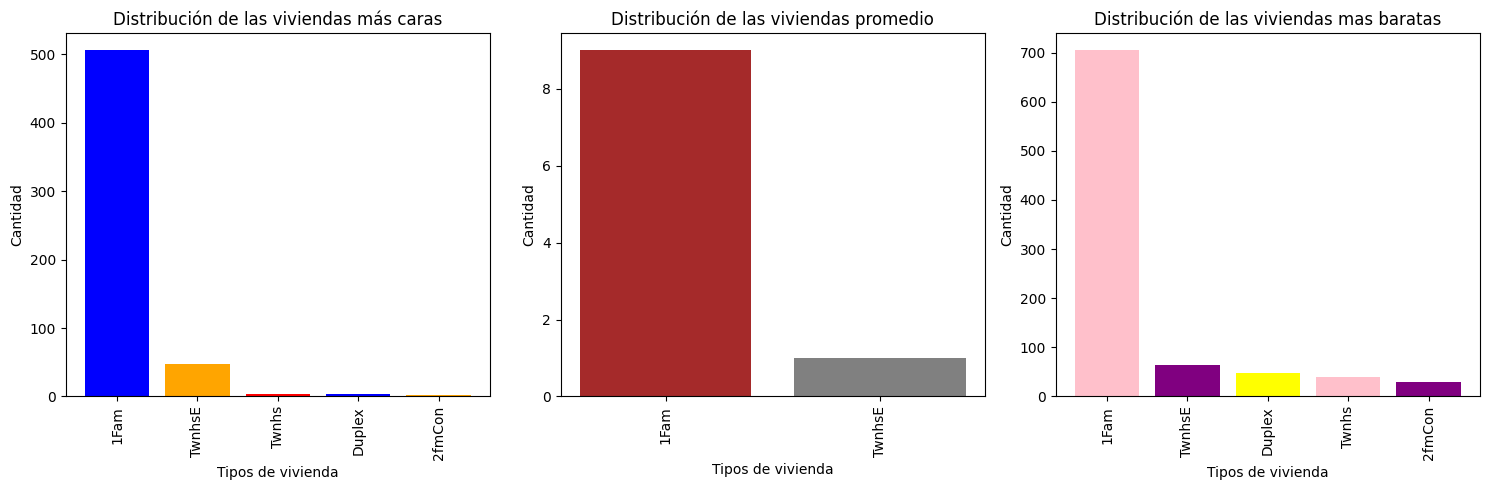

In [12]:
resultado = datos['BldgType'].value_counts()
print("Lista del tipo de vivienda mas solicitadas: ", resultado)

precios_vivienda_cara = datos[datos['Calificacion'] == 3]
precios_vivienda_promedio = datos[datos['Calificacion'] == 2]
precios_vivienda_barata = datos[datos['Calificacion'] == 1]

vivienda_cara = precios_vivienda_cara['BldgType'].value_counts()
vivienda_promedio = precios_vivienda_promedio['BldgType'].value_counts()
vivienda_barata = precios_vivienda_barata['BldgType'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(vivienda_cara.index, vivienda_cara.values, color=['blue', 'orange', 'red'])
axs[0].set_title('Distribución de las viviendas más caras')
axs[0].set_xlabel('Tipos de vivienda')
axs[0].set_ylabel('Cantidad')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(vivienda_promedio.index, vivienda_promedio.values, color=['brown', 'grey', 'skyblue'])
axs[1].set_title('Distribución de las viviendas promedio')
axs[1].set_xlabel('Tipos de vivienda')
axs[1].set_ylabel('Cantidad')
axs[1].tick_params(axis='x', rotation=90)

axs[2].bar(vivienda_barata.index, vivienda_barata.values, color=['pink', 'purple', 'yellow'])
axs[2].set_title('Distribución de las viviendas mas baratas')
axs[2].set_xlabel('Tipos de vivienda')
axs[2].set_ylabel('Cantidad')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

En este codigo reemplzamos los datos de valor 'NA' por 'No Garage', ya que en la descripcion de la base de datos, se especifica que 'NA' significa que la vivienda no tiene Garage

In [13]:
columnas_garage = ['GarageType', 'GarageFinish', 'GarageCond']
datos[columnas_garage] = datos[columnas_garage].fillna('No Garage')
datos

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice,Calificacion
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,Y,0,61,0,0,0,Normal,208500,3.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,6,8,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,Y,298,0,0,0,0,Normal,181500,3.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,Y,0,42,0,0,0,Normal,223500,3.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,Y,0,35,272,0,0,Abnorml,140000,1.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,Y,192,84,0,0,0,Normal,250000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Gtl,Gilbert,Norm,Norm,1Fam,6,5,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,Y,0,40,0,0,0,Normal,175000,1.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Gtl,NWAmes,Norm,Norm,1Fam,6,6,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,Y,349,0,0,0,0,Normal,210000,3.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,9,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,Y,0,60,0,0,0,Normal,266500,3.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Gtl,NAmes,Norm,Norm,1Fam,5,6,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,CBlock,TA,TA,Mn,GLQ,Rec,0,1078,GasA,Gd,Y,FuseA,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,Y,366,0,112,0,0,Normal,142125,1.0


En esta parte, se realizo un grafico en donde se demuestra la importancia de las remodelaciones de las viviendas, ya que las viviendas que tuvieron un remodelacion mas 'tardia' tienen un valor mayor

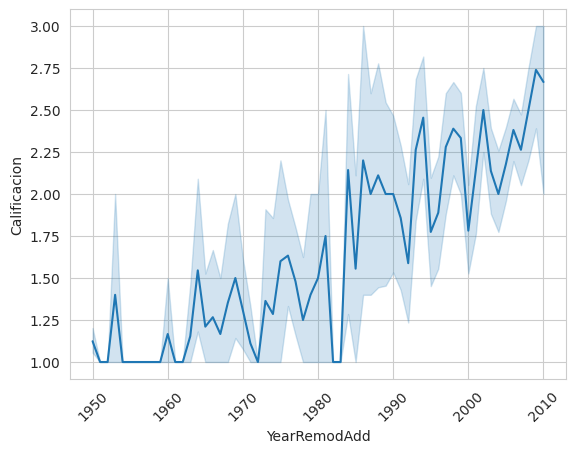

In [14]:
sns.set_style("whitegrid")
sns.lineplot(data=datos, x='YearRemodAdd', y='Calificacion')
plt.xticks(rotation=45)
plt.show()

En estos graficos se demuestran las condiciones generales de los hambientes  de la casa (cocina, garage, sotano, calefaccion)

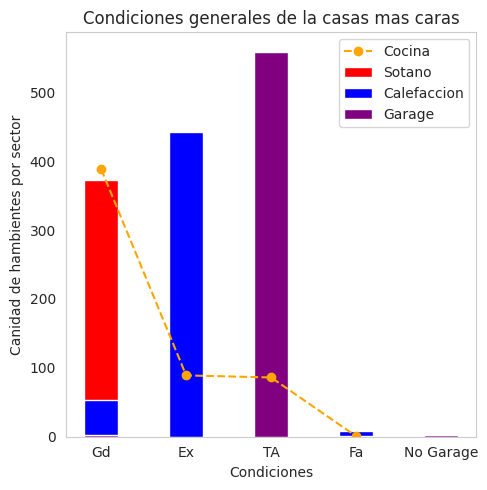

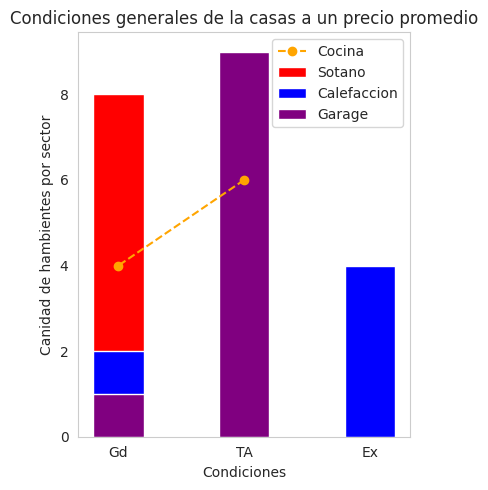

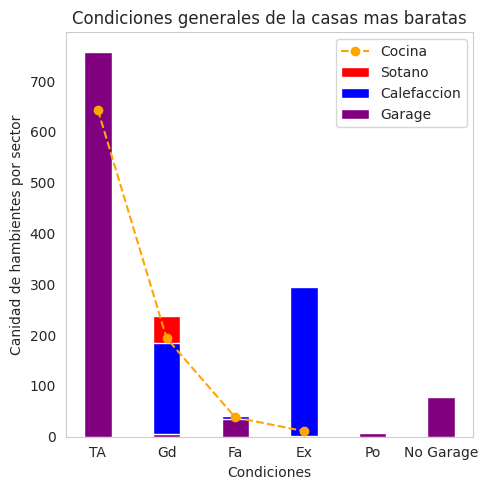

In [15]:
plt.figure(figsize=(5, 5))

estado_sotano = datos[datos['Calificacion'] == 3]
estado_calefaccion = datos[datos['Calificacion'] == 3]
estado_cocina = datos[datos['Calificacion'] == 3]
estado_garage = datos[datos['Calificacion'] == 3]

sotano = estado_sotano['BsmtQual'].value_counts()
Calefaccion = estado_calefaccion['HeatingQC'].value_counts()
Cocina = estado_cocina['KitchenQual'].value_counts()
Garage = estado_garage['GarageCond'].value_counts()

plt.bar(sotano.index, sotano.values,width=0.4, label="Sotano", color="red", align='center')
plt.bar(Calefaccion.index, Calefaccion.values,width=0.4, label="Calefaccion", color="blue", align='center')
plt.plot(Cocina.index, Cocina.values, label="Cocina", color="orange", linestyle="--", marker='o')
plt.bar(Garage.index, Garage.values,width=0.4, label="Garage", color="purple", align='center')

plt.legend()
plt.title("Condiciones generales de la casas mas caras")
plt.xlabel("Condiciones")
plt.ylabel("Canidad de hambientes por sector")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 5))

estado_sotano = datos[datos['Calificacion'] == 2]
estado_calefaccion = datos[datos['Calificacion'] == 2]
estado_cocina = datos[datos['Calificacion'] == 2]
estado_garage = datos[datos['Calificacion'] == 2]

sotano = estado_sotano['BsmtQual'].value_counts()
Calefaccion = estado_calefaccion['HeatingQC'].value_counts()
Cocina = estado_cocina['KitchenQual'].value_counts()
Garage = estado_garage['GarageCond'].value_counts()

plt.bar(sotano.index, sotano.values,width=0.4, label="Sotano", color="red", align='center')
plt.bar(Calefaccion.index, Calefaccion.values,width=0.4, label="Calefaccion", color="blue", align='center')
plt.plot(Cocina.index, Cocina.values, label="Cocina", color="orange", linestyle="--", marker='o')
plt.bar(Garage.index, Garage.values,width=0.4, label="Garage", color="purple", align='center')

plt.legend()
plt.title("Condiciones generales de la casas a un precio promedio")
plt.xlabel("Condiciones")
plt.ylabel("Canidad de hambientes por sector")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))

estado_sotano = datos[datos['Calificacion'] == 1]
estado_calefaccion = datos[datos['Calificacion'] == 1]
estado_cocina = datos[datos['Calificacion'] == 1]
estado_garage = datos[datos['Calificacion'] == 1]

sotano = estado_sotano['BsmtQual'].value_counts()
Calefaccion = estado_calefaccion['HeatingQC'].value_counts()
Cocina = estado_cocina['KitchenQual'].value_counts()
Garage = estado_garage['GarageCond'].value_counts()

plt.bar(sotano.index, sotano.values,width=0.4, label="Sotano", color="red", align='center')
plt.bar(Calefaccion.index, Calefaccion.values,width=0.4, label="Calefaccion", color="blue", align='center')
plt.plot(Cocina.index, Cocina.values, label="Cocina", color="orange", linestyle="--", marker='o')
plt.bar(Garage.index, Garage.values,width=0.4, label="Garage", color="purple", align='center')

plt.legend()
plt.title("Condiciones generales de la casas mas baratas")
plt.xlabel("Condiciones")
plt.ylabel("Canidad de hambientes por sector")
plt.grid()
plt.tight_layout()
plt.show()

Borro la columna de 'Calificacion' para que no afecte al entrenamiento del modelo de Marchine Learning

In [16]:
mode_1 = datos.loc[datos['Calificacion'] == 1, 'MasVnrType'].mode()[0]
mode_2 = datos.loc[datos['Calificacion'] == 2, 'MasVnrType'].mode()[0]
mode_3 = datos.loc[datos['Calificacion'] == 3, 'MasVnrType'].mode()[0]

datos.loc[(datos['Calificacion'] == 1) & (datos['MasVnrType'].isnull()), 'MasVnrType'] = mode_1
datos.loc[(datos['Calificacion'] == 2) & (datos['MasVnrType'].isnull()), 'MasVnrType'] = mode_2
datos.loc[(datos['Calificacion'] == 3) & (datos['MasVnrType'].isnull()), 'MasVnrType'] = mode_3


print(datos['MasVnrType'].isnull().sum())

0


In [17]:
datos.drop(['Calificacion'], axis=1, inplace=True)
datos

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,Y,0,61,0,0,0,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,6,8,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,Y,298,0,0,0,0,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,Y,0,42,0,0,0,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,Y,0,35,272,0,0,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,Y,192,84,0,0,0,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Gtl,Gilbert,Norm,Norm,1Fam,6,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,Y,0,40,0,0,0,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Gtl,NWAmes,Norm,Norm,1Fam,6,6,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,Y,349,0,0,0,0,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,9,2006,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,Y,0,60,0,0,0,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Gtl,NAmes,Norm,Norm,1Fam,5,6,1996,Hip,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,CBlock,TA,TA,Mn,GLQ,Rec,0,1078,GasA,Gd,Y,FuseA,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,Y,366,0,112,0,0,Normal,142125


Borro las filas con los datos nulos que quedan

In [18]:
columnas_a_verificar = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','MasVnrArea','Electrical']
datos = datos.dropna(subset=columnas_a_verificar)
datos

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,Y,0,61,0,0,0,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,6,8,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,Y,298,0,0,0,0,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,Y,0,42,0,0,0,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,Y,0,35,272,0,0,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,Y,192,84,0,0,0,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Gtl,Gilbert,Norm,Norm,1Fam,6,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,Y,0,40,0,0,0,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Gtl,NWAmes,Norm,Norm,1Fam,6,6,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,Y,349,0,0,0,0,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,7,9,2006,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,Y,0,60,0,0,0,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Gtl,NAmes,Norm,Norm,1Fam,5,6,1996,Hip,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,CBlock,TA,TA,Mn,GLQ,Rec,0,1078,GasA,Gd,Y,FuseA,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,Y,366,0,112,0,0,Normal,142125


Este código recorre cada columna del DataFrame datos, identifica las columnas que contienen variables categóricas y utiliza LabelEncoder para convertir esas variables categóricas en valores numéricos, lo que permite su uso en algoritmos de aprendizaje automático que requieren entradas numéricas.

## LabelEncoder

In [19]:
enc = LabelEncoder()
for col in datos.columns:
    if datos[col].dtype == 'object':
        datos[col] = enc.fit_transform(datos[col])

<ipython-input-19-cfb1598bf426>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[col] = enc.fit_transform(datos[col])
<ipython-input-19-cfb1598bf426>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[col] = enc.fit_transform(datos[col])
<ipython-input-19-cfb1598bf426>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Verifico como queda la base datos luego de haber realizado la ingenieria de variables

In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1412 non-null   int64  
 1   MSZoning       1412 non-null   int64  
 2   LotFrontage    1412 non-null   float64
 3   LotArea        1412 non-null   int64  
 4   Street         1412 non-null   int64  
 5   LotShape       1412 non-null   int64  
 6   LandContour    1412 non-null   int64  
 7   Utilities      1412 non-null   int64  
 8   LandSlope      1412 non-null   int64  
 9   Neighborhood   1412 non-null   int64  
 10  Condition1     1412 non-null   int64  
 11  Condition2     1412 non-null   int64  
 12  BldgType       1412 non-null   int64  
 13  OverallQual    1412 non-null   int64  
 14  OverallCond    1412 non-null   int64  
 15  YearRemodAdd   1412 non-null   int64  
 16  RoofStyle      1412 non-null   int64  
 17  RoofMatl       1412 non-null   int64  
 18  Exterior1st  

## Matriz de correlacion

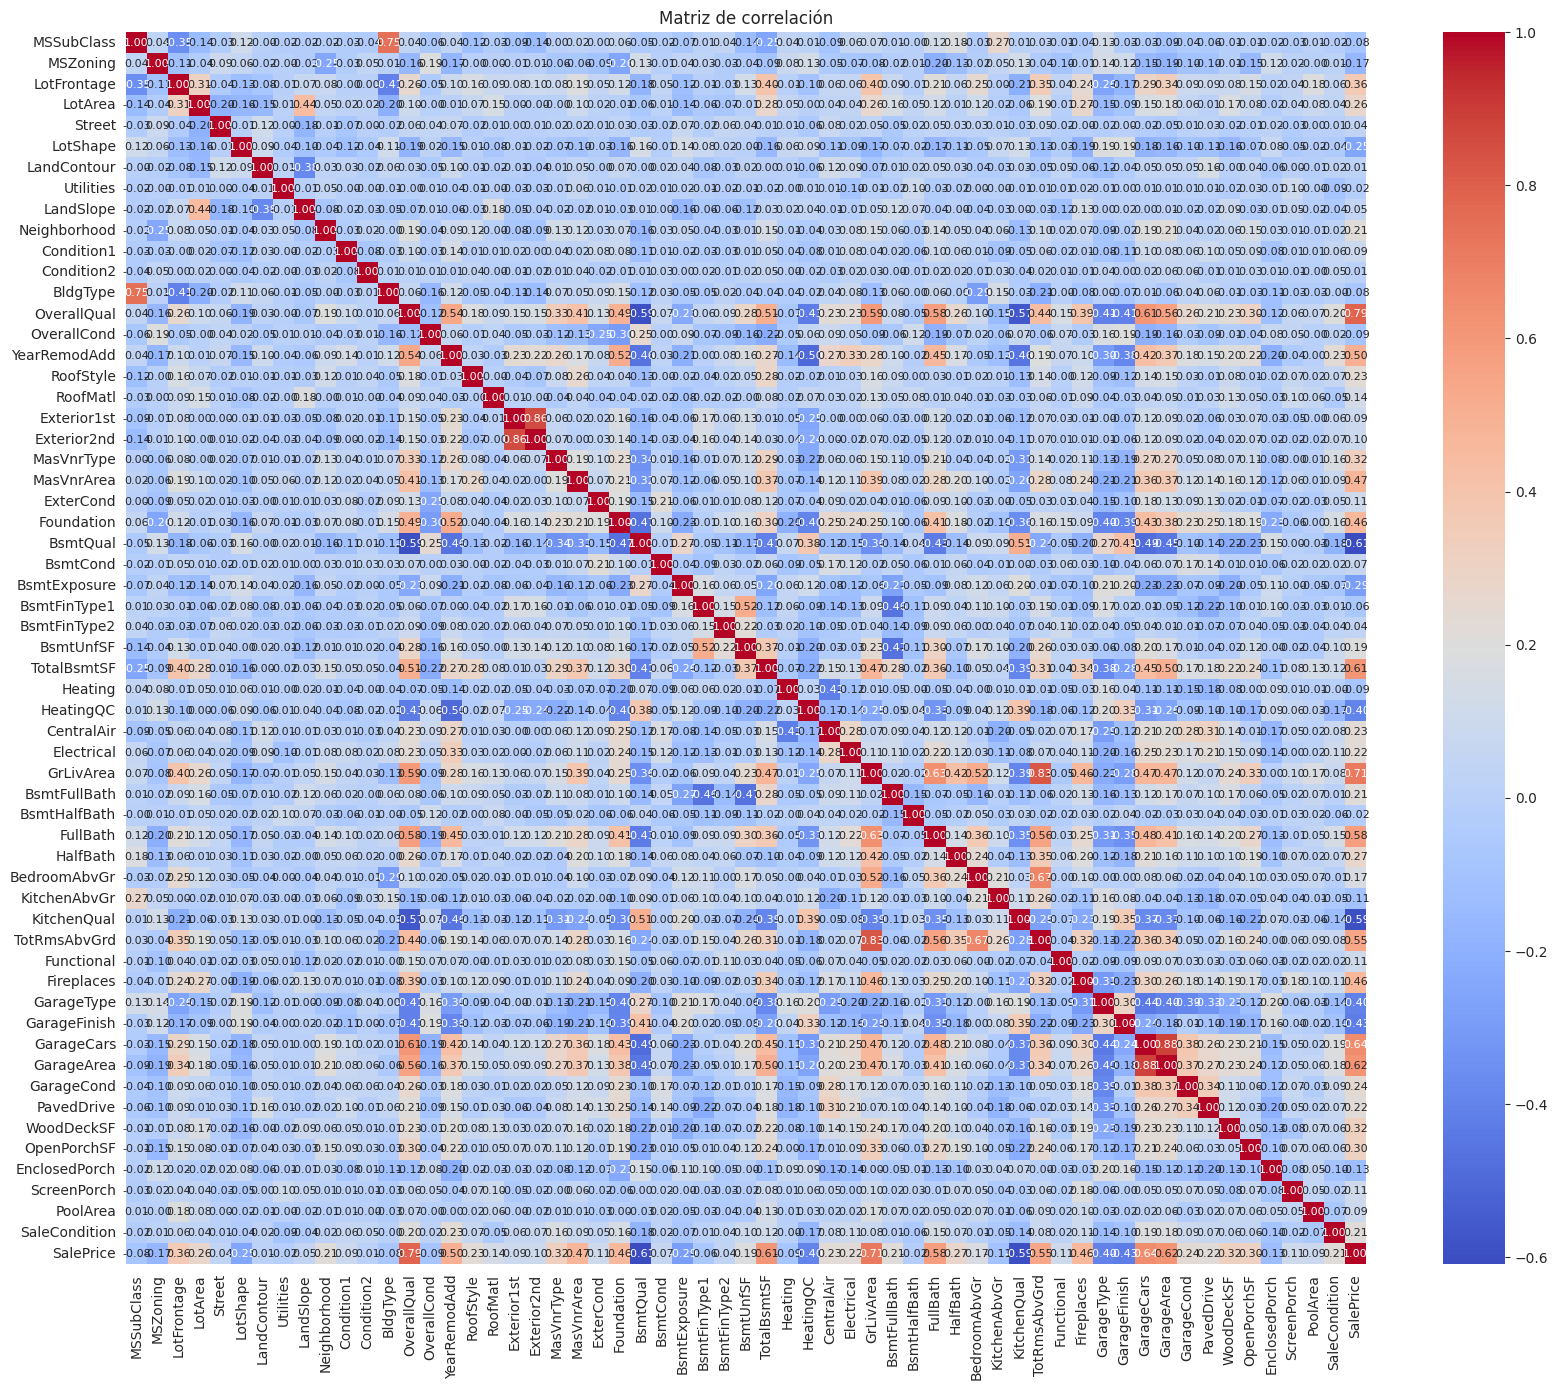

In [21]:
correlacion = datos.corr()

plt.figure(figsize=(20, 16))

sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

plt.title('Matriz de correlación')

plt.show()

In [22]:
datos_testeo = datos.tail(400)
datos_testeo

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice
1050,20,3,73.0,8993,1,0,3,0,0,8,2,2,0,7,5,2007,1,1,11,13,1,0.0,4,2,2,3,0,5,5,1302,1302,0,0,1,4,1302,0,0,2,0,3,1,2,6,6,0,1,0,2,436,5,2,0,22,0,0,0,5,176485
1051,20,3,103.0,11175,1,0,3,0,0,5,2,2,0,7,5,2007,1,1,11,13,1,0.0,4,2,2,3,0,5,5,1316,1316,0,0,1,4,1316,0,0,2,0,3,1,2,6,6,1,1,0,2,440,5,2,0,20,0,0,0,5,200141
1052,60,3,100.0,9500,1,3,3,0,0,12,0,2,0,6,6,1978,1,1,11,13,0,272.0,4,1,3,3,3,4,5,374,816,0,4,1,4,1977,0,1,1,1,4,1,3,9,6,1,1,2,2,540,5,2,0,52,0,0,0,4,165000
1053,20,3,68.0,8562,1,3,3,0,1,7,2,2,0,5,6,2002,3,1,5,6,2,145.0,4,1,3,3,0,4,5,833,1216,0,0,1,0,1526,0,0,1,0,4,1,3,7,3,1,2,3,1,364,5,2,116,78,0,0,0,4,144500
1054,60,3,90.0,11367,1,3,3,0,0,5,2,2,0,8,5,2002,1,1,11,13,1,210.0,4,2,2,3,2,2,5,133,1065,0,0,1,4,1989,1,0,2,1,3,1,2,7,6,1,1,0,2,586,5,2,199,60,0,0,0,4,255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,0,8,2,2,0,6,5,2000,1,1,11,13,1,0.0,4,2,2,3,3,5,5,953,953,0,0,1,4,1647,0,0,2,1,3,1,3,7,6,1,1,2,2,460,5,2,0,40,0,0,0,4,175000
1456,20,3,85.0,13175,1,3,3,0,0,14,2,2,0,6,6,1988,1,1,8,10,2,119.0,4,1,2,3,3,0,4,589,1542,0,4,1,4,2073,1,0,2,0,3,1,3,7,2,2,1,3,2,500,5,2,349,0,0,0,0,4,210000
1457,70,3,66.0,9042,1,3,3,0,0,6,2,2,0,7,9,2006,1,1,4,5,1,0.0,2,3,3,1,3,2,5,877,1152,0,0,1,4,2340,0,0,2,0,4,1,2,9,6,2,1,2,1,252,5,2,0,60,0,0,0,4,266500
1458,20,3,68.0,9717,1,3,3,0,0,12,2,2,0,5,6,1996,3,1,7,8,1,0.0,4,1,3,3,2,2,4,0,1078,0,2,1,0,1078,1,0,1,0,2,1,2,5,6,0,1,3,1,240,5,2,366,0,112,0,0,4,142125


In [23]:
index_to_drop = datos_testeo.index
datos = datos.drop(index_to_drop)

In [24]:
datos

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,0,5,2,2,0,7,5,2003,1,1,11,13,1,196.0,4,2,2,3,3,2,5,150,856,0,0,1,4,1710,1,0,2,1,3,1,2,8,6,0,1,2,2,548,5,2,0,61,0,0,0,4,208500
1,20,3,80.0,9600,1,3,3,0,0,24,1,2,0,6,8,1976,1,1,7,8,1,0.0,4,1,2,3,1,0,5,284,1262,0,0,1,4,1262,0,1,2,0,3,1,3,6,6,1,1,2,2,460,5,2,298,0,0,0,0,4,181500
2,60,3,68.0,11250,1,0,3,0,0,5,2,2,0,7,5,2002,1,1,11,13,1,162.0,4,2,2,3,2,2,5,434,920,0,0,1,4,1786,1,0,2,1,3,1,2,6,6,1,1,2,2,608,5,2,0,42,0,0,0,4,223500
3,70,3,60.0,9550,1,0,3,0,0,6,2,2,0,7,5,1970,1,1,12,15,1,0.0,4,0,3,1,3,0,5,540,756,0,2,1,4,1717,1,0,1,0,3,1,2,7,6,1,5,3,3,642,5,2,0,35,272,0,0,0,140000
4,60,3,84.0,14260,1,0,3,0,0,15,2,2,0,8,5,2000,1,1,11,13,1,350.0,4,2,2,3,0,2,5,490,1145,0,0,1,4,2198,1,0,2,1,4,1,2,9,6,1,1,2,3,836,5,2,192,84,0,0,0,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,120,3,34.0,5381,1,0,3,0,0,16,2,2,3,6,5,2005,1,1,11,13,2,135.0,4,2,2,3,0,0,5,406,1306,0,0,1,4,1306,1,0,2,0,1,1,2,5,6,1,1,2,2,624,5,2,170,63,0,0,0,4,196000
1043,60,3,86.0,11839,1,3,3,0,0,20,2,2,0,7,5,1990,3,1,5,6,1,99.0,4,2,2,3,3,2,5,390,1475,0,0,1,4,2329,1,0,2,1,4,1,2,10,6,1,1,3,2,514,5,2,192,121,0,0,0,4,262280
1044,20,3,80.0,9600,1,3,3,0,0,14,4,2,0,8,5,1981,3,7,2,3,1,0.0,4,2,2,3,3,0,5,1420,2524,0,4,1,4,2524,1,0,2,1,4,1,2,9,6,1,1,0,2,542,5,2,474,120,0,0,0,4,278000
1046,60,3,85.0,16056,1,0,3,0,0,22,2,2,0,9,5,2006,3,1,4,5,2,208.0,4,2,0,3,0,2,5,1752,1992,0,0,1,4,2868,0,0,3,1,4,1,0,11,6,1,3,0,3,716,5,2,214,108,0,0,0,5,556581


# Division de la base de datos y busqueda del mejor modelo

In [25]:
y = datos['SalePrice']
x = datos.drop(['SalePrice'], axis = 1)

In [26]:
skfold_inner = KFold(n_splits=10,shuffle=True)
skfold_outer = KFold(n_splits=10,shuffle=True)

## KNN

In [27]:
param_grid_knn = {
    'n_neighbors': [120, 100, 80, 50, 25, 12, 6, 10, 7, 8, 9]
}

model_knn = KNeighborsRegressor()

grid_search_knn = GridSearchCV(
    estimator=model_knn,
    param_grid=param_grid_knn,
    cv=skfold_inner,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

nested_cv = cross_validate(
    estimator=grid_search_knn,
    X=x,
    y=y,
    cv=skfold_outer,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

result_cv = pd.DataFrame(nested_cv)
mean_test_score = -result_cv['test_score'].mean()
std_test_score = result_cv['test_score'].std()
median_test_score = -result_cv['test_score'].median()

print("Promedio del test_score (MAE): ", mean_test_score)
print("Desviación estándar del test_score: ", std_test_score)
print("Mediana del test_score (MAE): ", median_test_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Promedio del test_score (MAE):  29963.945143800094
Desviación estándar del test_score:  4282.194466777238
Mediana del test_score (MAE):  28404.543729372937


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.2s finished


## Lasso

In [28]:
param_grid_lasso = {
    'alpha': [0.1, 0.2, 0.3, 0.4]
}

model_lasso = Lasso()

grid_search_lasso = GridSearchCV(
    estimator=model_lasso,
    param_grid=param_grid_lasso,
    cv=skfold_inner,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

nested_cv = cross_validate(
  estimator=grid_search_lasso,
  X=x,
  y=y,
  cv=skfold_outer,
  scoring='neg_mean_absolute_error',
  n_jobs=-1
)
result_cv = pd.DataFrame(nested_cv)
mean_test_score_lasso1 = -result_cv['test_score'].mean()
std_test_score_lasso1 = -result_cv['test_score'].std()
median_test_score_lasso1 = -result_cv['test_score'].median()


print("Resultados para Carga de calefacción con Lasso:")
print("Promedio del test_score: ", mean_test_score_lasso1)
print("Desviación estándar del test_score: ", std_test_score_lasso1)
print("Mediana del test_score: ", median_test_score_lasso1)

Resultados para Carga de calefacción con Lasso:
Promedio del test_score:  20033.223127195793
Desviación estándar del test_score:  -1921.4627308388685
Mediana del test_score:  19499.24449970581


## Ridge

In [29]:
param_grid_ridge = {
    'alpha': [0.002, 0.003, 0.01, 0.1, 0.2, 0.3, 0.4]
}

model_ridge = Ridge()

grid_search_ridge2 = GridSearchCV(
    estimator=model_ridge,
    param_grid=param_grid_ridge,
    cv=skfold_inner,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)


nested_cv = cross_validate(
  estimator=grid_search_ridge2,
  X=x,
  y=y,
  cv=skfold_outer,
  scoring='neg_mean_absolute_error',
  n_jobs=-1
)
result_cv = pd.DataFrame(nested_cv)
mean_test_score_ridge1 = -result_cv['test_score'].mean()
std_test_score_ridge1 = -result_cv['test_score'].std()
median_test_score_ridge1 = -result_cv['test_score'].median()


print("Resultados para Carga de calefacción con Ridge:")
print("Promedio del test_score: ", mean_test_score_ridge1)
print("Desviación estándar del test_score: ", std_test_score_ridge1)
print("Mediana del test_score: ", median_test_score_ridge1)

Resultados para Carga de calefacción con Ridge:
Promedio del test_score:  19677.215514819745
Desviación estándar del test_score:  -2260.1440298586117
Mediana del test_score:  19670.63620673037


## Arbol de decision

In [30]:
param_grid_dt = {
    'max_depth': [1, 2, 5, 8, 7, 30, 6, 80, 100]
}

model_dt = DecisionTreeRegressor(random_state=123)

grid_search_dt = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid_dt,
    cv=skfold_inner,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

nested_cv_dt = cross_validate(grid_search_dt, X=x, y=y, cv=skfold_outer, return_train_score=True, scoring='neg_mean_absolute_error')

result_cv_dt = pd.DataFrame(nested_cv_dt)

mean_test_score_dt = -result_cv_dt['test_score'].mean()
std_test_score_dt = -result_cv_dt['test_score'].std()
median_test_score_dt = -result_cv_dt['test_score'].median()

print("Promedio del test_score: ", mean_test_score_dt)
print("Desviación estándar del test_score: ", std_test_score_dt)
print("Mediana del test_score: ", median_test_score_dt)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Promedio del test_score:  28845.814781286062
Desviación estándar del test_score:  -2579.07919682227
Mediana del test_score:  30006.361092162


## LGBMRegressor


In [31]:
from lightgbm import LGBMRegressor

param_grid_lgbm = {
    'n_estimators': [15, 10, 20],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.1, 0.2, 0.3]
}

model_lgbm = LGBMRegressor(objective='regression')

grid_search_lgbm = GridSearchCV(
    estimator=model_lgbm,
    param_grid=param_grid_lgbm,
    cv=skfold_inner,
    scoring='neg_mean_absolute_error',  # MAE como métrica
    n_jobs=-1,
    verbose=2
)

nested_cv_lgbm = cross_validate(
    estimator=grid_search_lgbm,
    X=x,
    y=y,
    cv=skfold_outer,
    return_train_score=True,
    scoring='neg_mean_absolute_error'  # MAE como métrica
)

result_cv_lgbm = pd.DataFrame(nested_cv_lgbm)

mean_test_score_lgbm = -result_cv_lgbm['test_score'].mean()  # Invertir el signo
std_test_score_lgbm = result_cv_lgbm['test_score'].std()
median_test_score_lgbm = -result_cv_lgbm['test_score'].median()  # Invertir el signo

print("Promedio del test_score (MAE): ", mean_test_score_lgbm)
print("Desviación estándar del test_score: ", std_test_score_lgbm)
print("Mediana del test_score (MAE): ", median_test_score_lgbm)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 910, number of used features: 52
[LightGBM] [Info] Start training from score 184244.452747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

#Analisis del rendimientos de los modelos

In [32]:
results_dict = {
    'Modelo': ['KNN', 'LGBMRegressor', 'Lasso', 'Árbol de decisión', 'Ridge'],
    'Promedio': [mean_test_score, mean_test_score_lgbm, mean_test_score_lasso1, mean_test_score_dt, mean_test_score_ridge1],
    'Desviación Estándar': [std_test_score, std_test_score_lgbm, -std_test_score_lasso1, -std_test_score_dt, -std_test_score_ridge1]
}

df = pd.DataFrame(results_dict)

df_sorted = df.sort_values(by='Promedio', ascending=True)

df_sorted

,Modelo,Promedio,Desviación Estándar
1,LGBMRegressor,18157.098196,2328.254134
4,Ridge,19677.215515,2260.144030
2,Lasso,20033.223127,1921.462731
3,Árbol de decisión,28845.814781,2579.079197
0,KNN,29963.945144,4282.194467


#Mejor modelo

In [34]:
algoritmo_elegido = grid_search_lgbm
algoritmo_elegido.fit(x, y)

elegido_resultados = pd.DataFrame(algoritmo_elegido.cv_results_).loc[algoritmo_elegido.best_index_]

elegido_promedio = elegido_resultados.mean_test_score
elegido_desvio = elegido_resultados.std_test_score

parametros = algoritmo_elegido.best_params_

print('R2: ', -elegido_promedio)
print ("Los mejores hiperparametros del modelo elegido son: ",algoritmo_elegido.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 1012, number of used features: 53
[LightGBM] [Info] Start training from score 183917.789526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

# Evaluacion del rendimiento del modelo

## Distribucion normal

Promedio de la base de y es: 183917.7895256917
Desviación estándar de y es: 80836.7192481567
MAE del modelo es: 18015.05837255597


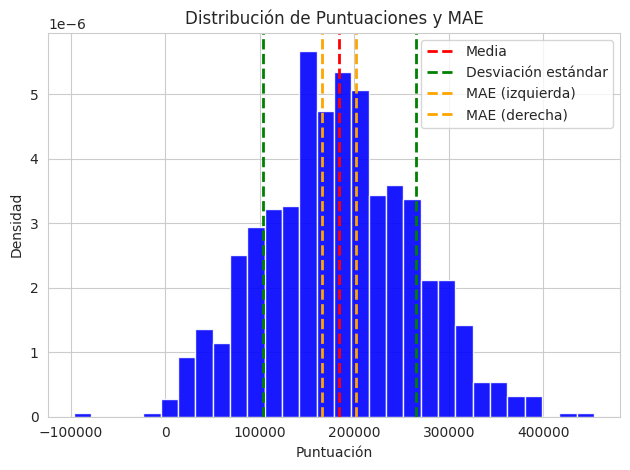

In [35]:
desviacion = datos['SalePrice'].std()
promedio = datos['SalePrice'].mean()
mae = -elegido_promedio
print("Promedio de la base de y es:", promedio)
print("Desviación estándar de y es:", desviacion)
print("MAE del modelo es:", mae)

mu = promedio
sigma = desviacion
mae_value = mae

data = np.random.normal(mu, sigma, 1000)

plt.hist(data, bins=30, density=True, alpha=0.9, color='blue')

plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label='Media')

plt.axvline(mu - sigma, color='green', linestyle='dashed', linewidth=2, label='Desviación estándar')
plt.axvline(mu + sigma, color='green', linestyle='dashed', linewidth=2)

plt.axvline(mu - mae_value, color='orange', linestyle='dashed', linewidth=2, label='MAE (izquierda)')

plt.axvline(mu + mae_value, color='orange', linestyle='dashed', linewidth=2, label='MAE (derecha)')

plt.xlabel('Puntuación')
plt.ylabel('Densidad')
plt.title('Distribución de Puntuaciones y MAE')
plt.legend()

plt.tight_layout()
plt.show()

En el siguiente grafico se puede observar la distribucion normal, en donde se muestra el promedio de puntuacion de 'y' (SalePrice) que es de 182.507 y su respectiva desviacion estandar (79.270). El valor de MAE es de 17.048, lo cual sugiere que el modelo hace predicciones certeras, ya que el 'error' del modelo se encuentra entre el rango de la desviacion estandar, como se puede visualizar en el anterior grafico

## Curvas de aprendizaje

[learning_curve] Training set sizes: [ 91 182 273 364 455 546 637 728 819 910]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


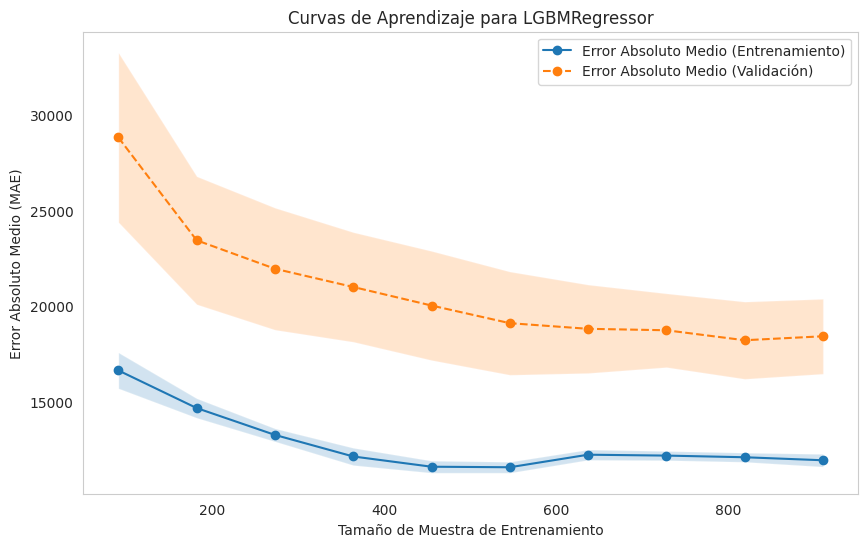

In [36]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=algoritmo_elegido.best_estimator_,
    X=x,
    y=y,
    cv=skfold_outer,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=2
)


train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Error Absoluto Medio (Entrenamiento)', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label='Error Absoluto Medio (Validación)', marker='o', linestyle='--')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)


plt.title('Curvas de Aprendizaje para LGBMRegressor')
plt.xlabel('Tamaño de Muestra de Entrenamiento')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.legend(loc='best')
plt.grid()
plt.show()


En las curvas de aprendizaje se puede observar claramente que el modelo no presenta problemas de Overfitting o Underfitting. Ya que las curvas de entrenamiento (azul) y la de validacion (naranja) tienden a convergir a valores similares a los que se imprimieron, como tambien su gap (brecha entre amabas curvas) no es alto.

## Visualizacion del mejor modelo

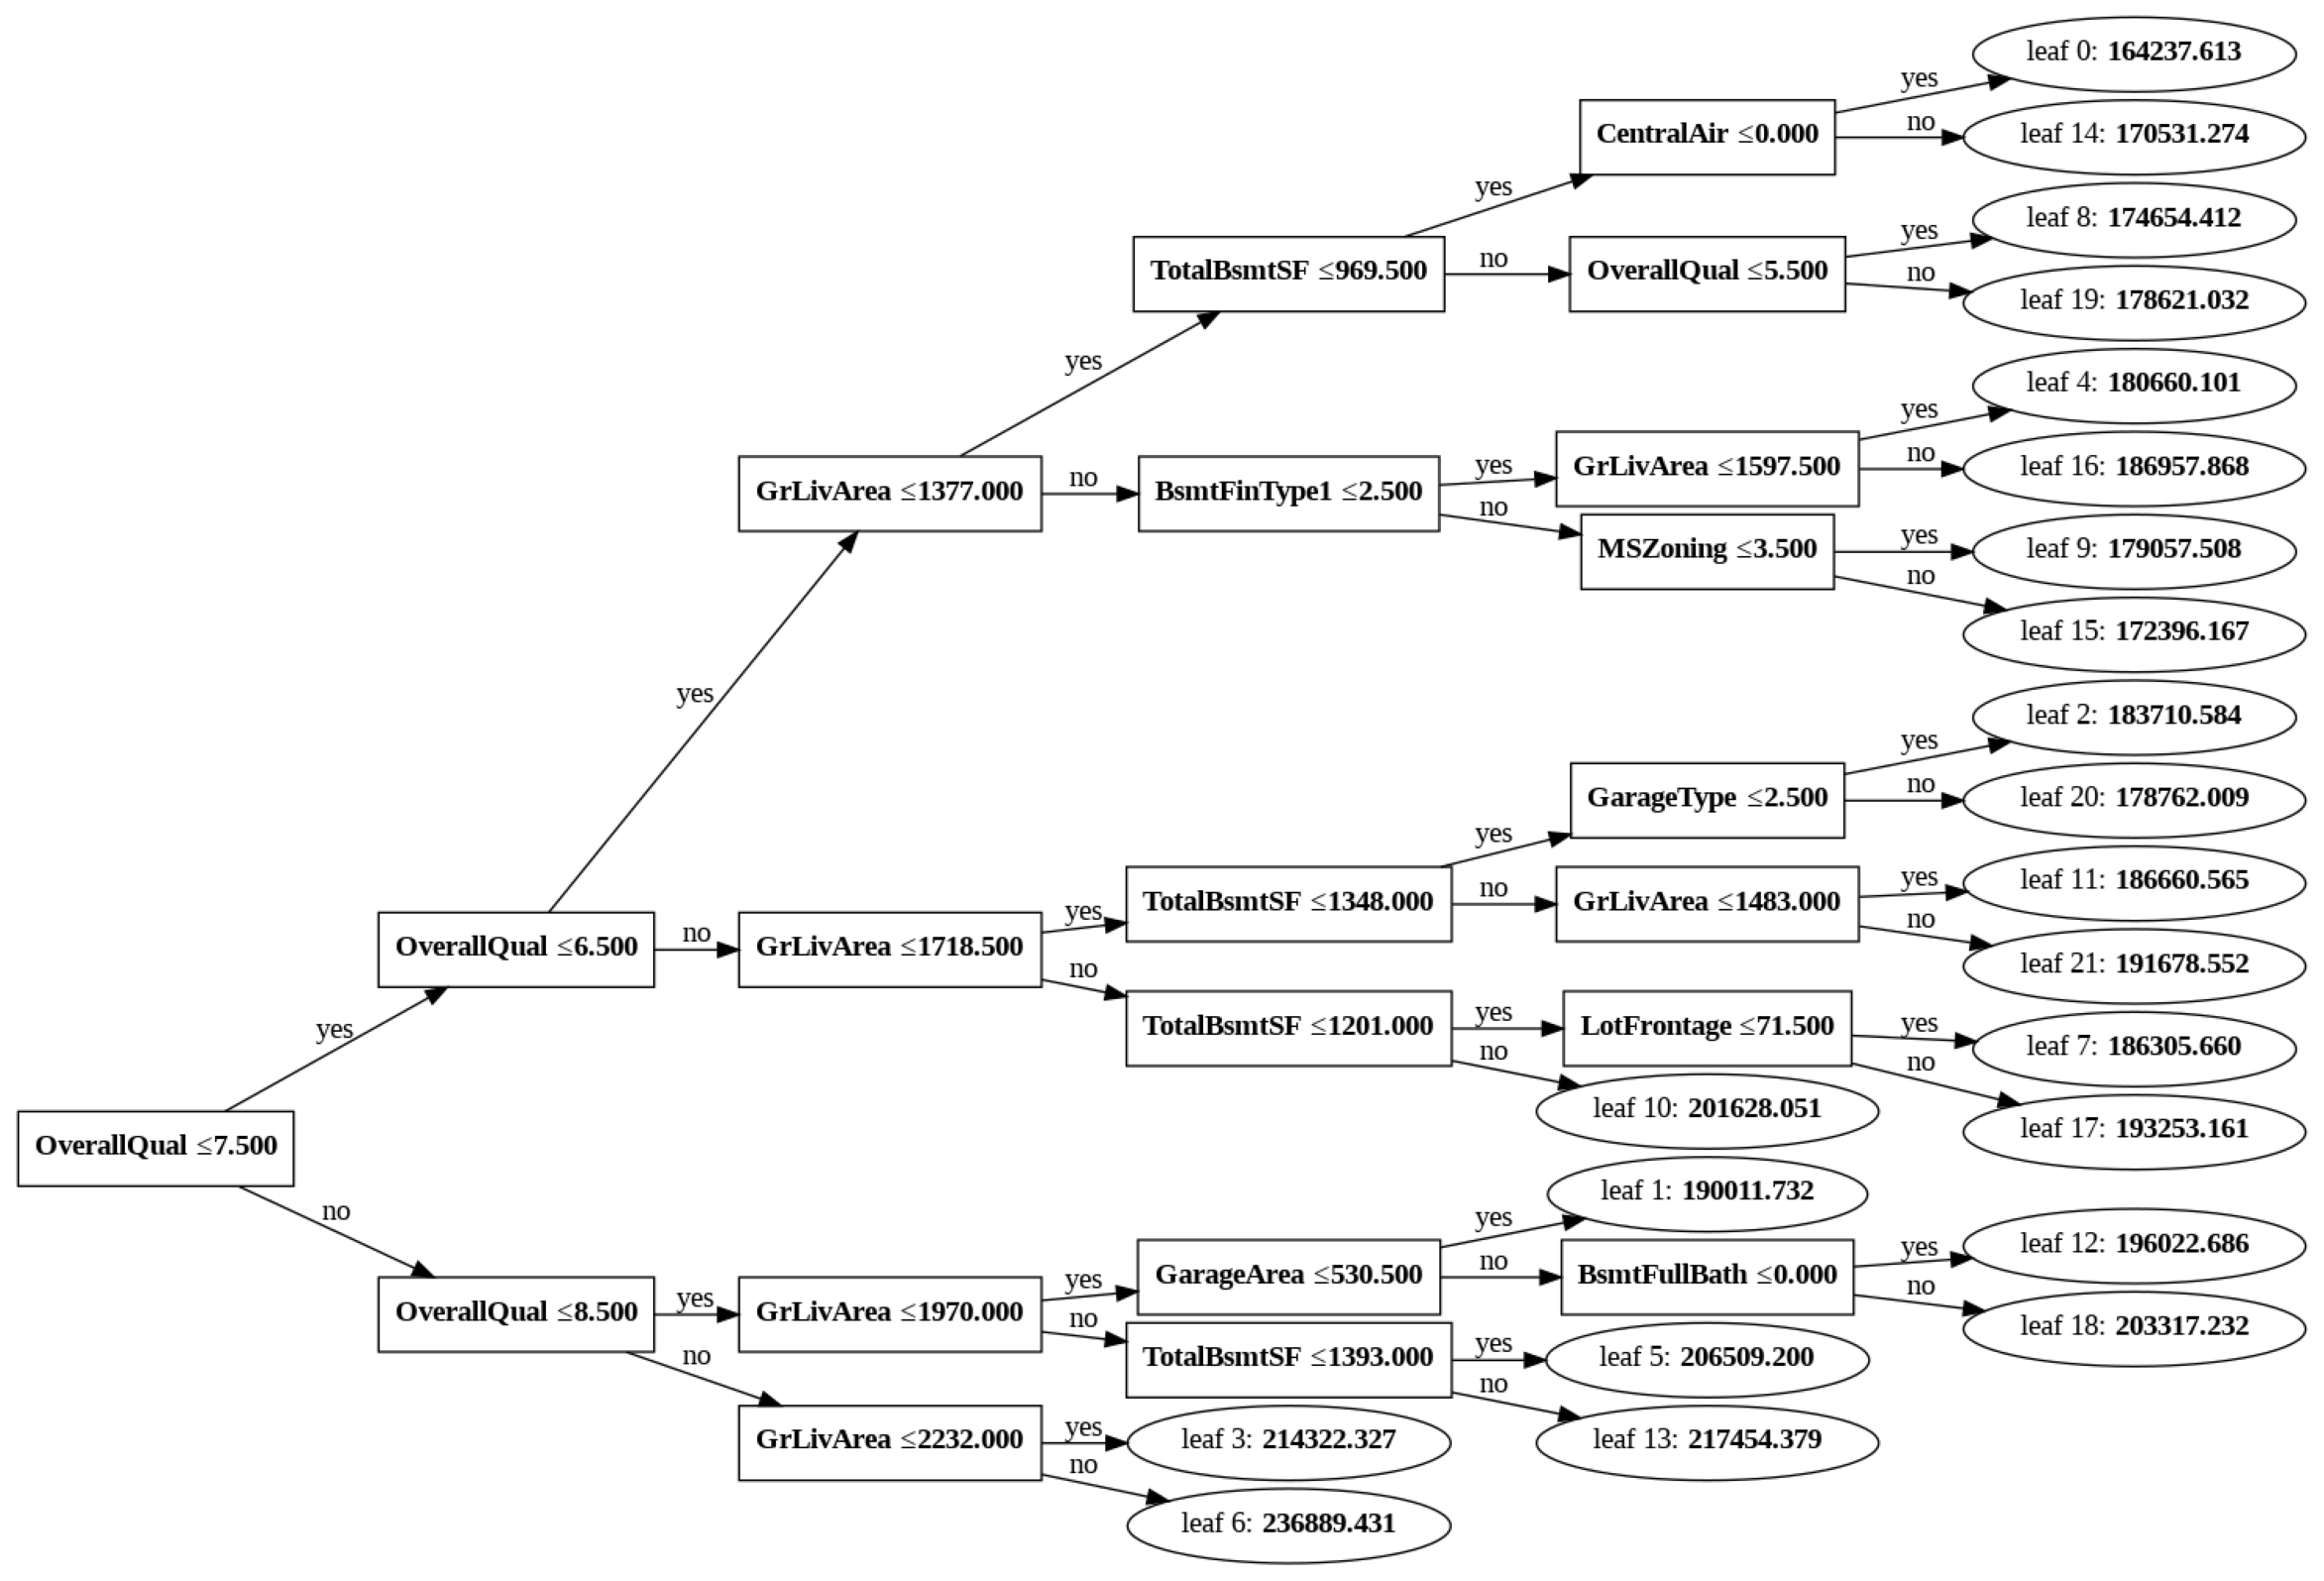

In [37]:
best_estimator = grid_search_lgbm.best_estimator_

best_booster = best_estimator.booster_

fig, ax = plt.subplots(figsize=(30, 30))
lgb.plot_tree(best_booster, tree_index=0, figsize=(30, 30), ax=ax)
plt.show()

## Se guarda el mejor modelo

In [38]:
import joblib

In [39]:
filename = '/content/drive/My Drive/Lgbm_Precios_Casa.sav'
joblib.dump(best_estimator, filename)

['/content/drive/My Drive/Lgbm_Precios_Casa.sav']

# Produccion

In [40]:
y_testeo = datos_testeo['SalePrice']
x_testeo = datos_testeo.drop(['SalePrice'], axis = 1)

In [41]:
from sklearn.metrics import mean_absolute_error

filename = '/content/drive/My Drive/Lgbm_Precios_Casa.sav'
loaded_model = joblib.load(filename)

# Realizar las predicciones
predicciones = loaded_model.predict(x_testeo)

# Calcular el MAE
mae = mean_absolute_error(y_testeo, predicciones)

# Imprimir el resultado del MAE
print(f"MAE del modelo en producción: {mae:.2f}")

MAE del modelo en producción: 17749.43


LightGBM logra adaptarse de manera asertiva a nuevos datos gracias a una combinación de factores: su estructura basada en árboles de decisión, su algoritmo de optimización, sus técnicas de regularización y su eficiencia. Estas características hacen que logre adaptarse de manera asertiva a la hora de realizar predicciones con datos con los cuales nunca fue entrenado.